In [2]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_classification, make_circles
import mne
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mne
from datetime import date

In [7]:
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_classes=2, class_sep=10,random_state=12)

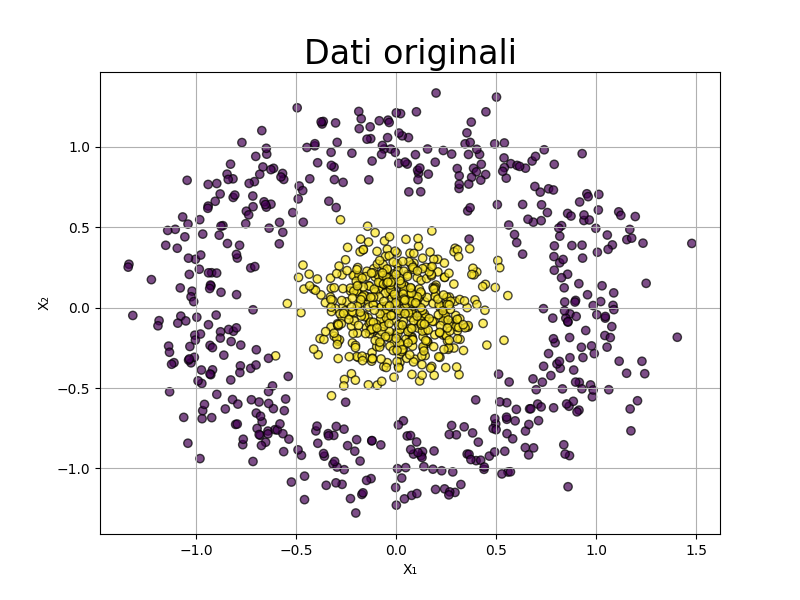

In [42]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.title('Dati originali', fontsize = 24)
plt.grid(True)
plt.show()

In [3]:
%matplotlib widget

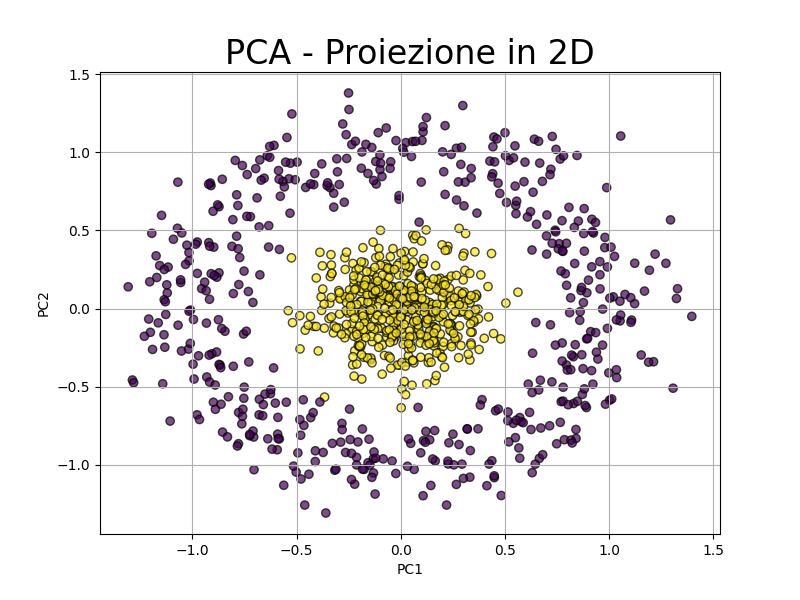

In [41]:
pca = PCA(2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Proiezione in 2D', fontsize = 24)
plt.grid(True)
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

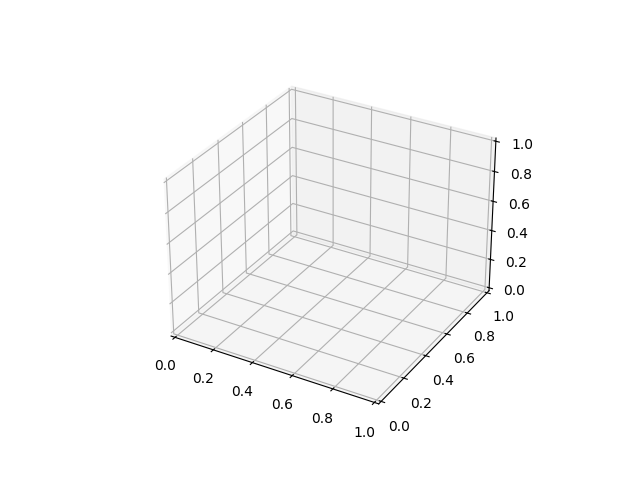

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o', alpha=0.7)
origin = np.zeros(3)  
scale = 10

for i in range(2):  # prime due componenti
    vector = pca.components_[i] * scale
    ax.quiver(
        origin[0], origin[1], origin[2],  # punto di partenza
        vector[0], vector[1], vector[2],  # direzione e lunghezza
        color='red',
        linewidth=2,
        arrow_length_ratio=0.1
    )
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

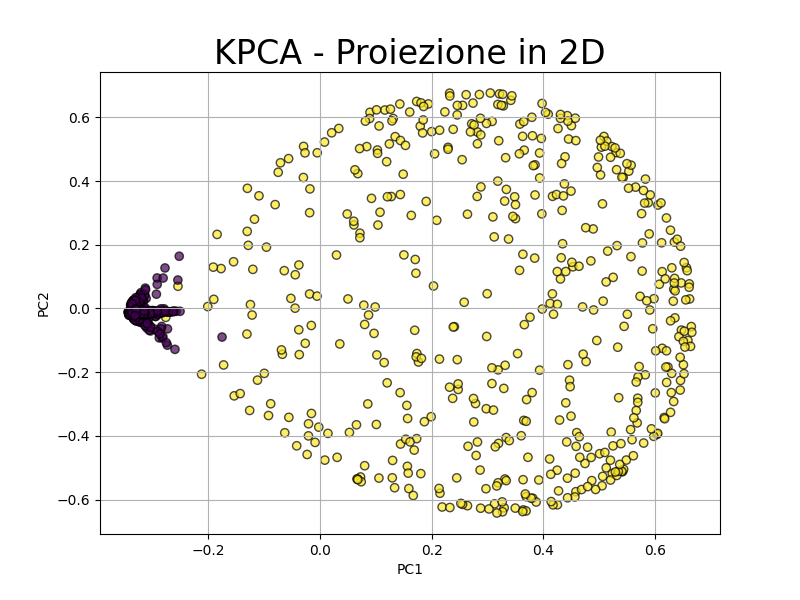

In [40]:
kpca = KernelPCA(None, kernel='rbf', gamma=10, alpha=0.1 )
kX_pca = kpca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(kX_pca[:, 0], kX_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KPCA - Proiezione in 2D', fontsize = 24)
plt.grid(True)
plt.show()

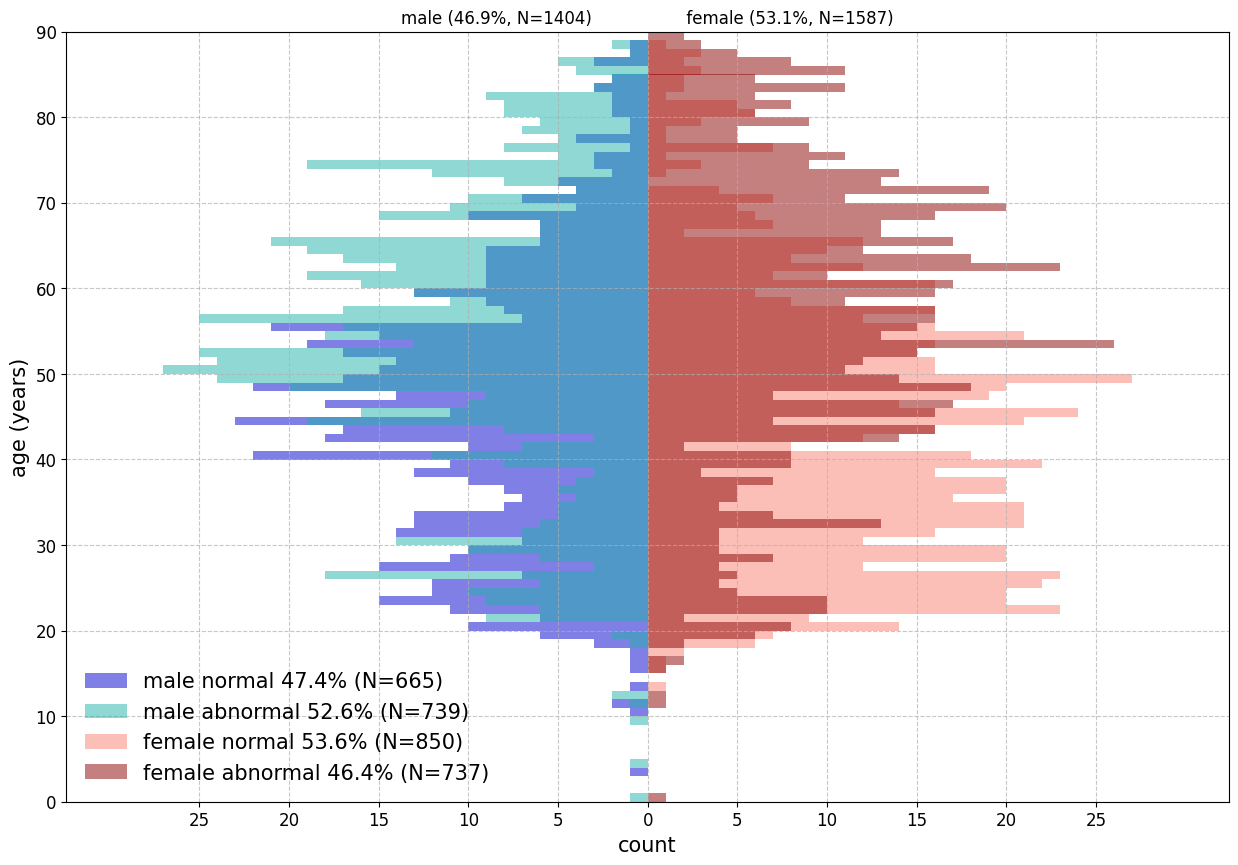

In [13]:
def create_age_pyramid_overlapped(ax, ages_male_normal, ages_male_abnormal,
                                 ages_female_normal, ages_female_abnormal,
                                 bins):
    hist_male_normal, _ = np.histogram(ages_male_normal, bins=bins)
    hist_male_abnormal, _ = np.histogram(ages_male_abnormal, bins=bins)
    hist_female_normal, _ = np.histogram(ages_female_normal, bins=bins)
    hist_female_abnormal, _ = np.histogram(ages_female_abnormal, bins=bins)
    total_males_normal = len(ages_male_normal)
    total_males_abnormal = len(ages_male_abnormal)
    total_females_normal = len(ages_female_normal)
    total_females_abnormal = len(ages_female_abnormal)
    total_males = total_males_normal + total_males_abnormal
    total_females = total_females_normal + total_females_abnormal
    total_overall = total_males + total_females
    male_overall_pct = (total_males / total_overall * 100) if total_overall > 0 else 0
    female_overall_pct = (total_females / total_overall * 100) if total_overall > 0 else 0
    male_normal_pct_sex = (total_males_normal / total_males * 100) if total_males > 0 else 0
    male_abnormal_pct_sex = (total_males_abnormal / total_males * 100) if total_males > 0 else 0
    female_normal_pct_sex = (total_females_normal / total_females * 100) if total_females > 0 else 0
    female_abnormal_pct_sex = (total_females_abnormal / total_females * 100) if total_females > 0 else 0
    ax.set_title(f"male ({male_overall_pct:.1f}%, N={total_males}) "
                 f"                 female ({female_overall_pct:.1f}%, N={total_females})")
    bin_centers = bins[:-1] + np.diff(bins)/2
    ax.barh(bin_centers, -hist_male_normal, height=1, color='mediumblue', alpha=0.5,
            label=f'male normal {male_normal_pct_sex:.1f}% (N={total_males_normal})')
    ax.barh(bin_centers, -hist_male_abnormal, height=1, color='lightseagreen', alpha=0.5,
            label=f'male abnormal {male_abnormal_pct_sex:.1f}% (N={total_males_abnormal})')
    ax.barh(bin_centers, hist_female_normal, height=1, color='salmon', alpha=0.5,
            label=f'female normal {female_normal_pct_sex:.1f}% (N={total_females_normal})')
    ax.barh(bin_centers, hist_female_abnormal, height=1, color='darkred', alpha=0.5,
            label=f'female abnormal {female_abnormal_pct_sex:.1f}% (N={total_females_abnormal})')
    max_count = max(hist_male_normal.max(), hist_male_abnormal.max(),
                    hist_female_normal.max(), hist_female_abnormal.max())
    ax.set_xlim(-max_count * 1.2, max_count * 1.2) 
    ticks = np.arange(0, max_count + 1, max_count // 5 if max_count > 5 else 1)
    ax.set_xticks([-t for t in ticks if t > 0] + list(ticks))
    ax.set_xticklabels([str(abs(int(t))) for t in ax.get_xticks()])
    ax.set_xlabel('count', fontsize=15)
    ax.set_ylabel('age (years)', fontsize=15)
    ax.set_ylim(0, 90) # Range di età
    ax.set_yticks(np.arange(0, 91, 10))
    ax.legend(loc='lower left', frameon=False, fontsize=15)
    ax.grid(linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
def create_repeated_array(values, repetitions):
    if len(values) != len(repetitions):
        raise ValueError("Le liste 'values' e 'repetitions' devono avere la stessa lunghezza.")

    result_list = []
    for i in range(len(values)):
        value = values[i]
        num_repetitions = repetitions[i]
        
        result_list.extend([value] * num_repetitions)
        
    return np.array(result_list)
eta = np.arange(0,101,1)
                 #0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4, 5, 6,7,8,9, 0,1,2,3,4,5,6,7,8,9,0,1,2,3
count_pat_m_tr = [1,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0,9,6,7,10,6,15,3,6,9,14,7,6,5,5,3,5,3,2,5,6,6,2,7,17,11,10,9,18,22,23,22,24,12,13,16,23,15,10,12,14,17,14,16,19,21,4,5,15,10,10,4,7,11,19,3,7,4,6,6,6,7,9,3,2,4,5,1,2,0,0,0,0,0,0,0,1,1,0,0,0]
count_pat_m_te = [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0,0,1,0,0,0,0,0,1,0,1,1,3,1,1,1,1,2,0,0,0,2,2,4,2,1,1,5,1,2,2,1,1,2,2,0,1,0,0,2,1,0,1,0,0,1,1,0,2,1,1,1,0,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0]
count_n_m_tr =   [0,0,0,1,0,0,0,0,0,0,1,2,0,1,0,1,1,1,3,5,10,5,10,13,10,9,6,15,9,10,4,12,11,12,7,7,7,6,11,9,20,9,17,16,17,11,18,11,20,16,14,14,16,18,14,19,7,8,7,10,9,9,8,7,9,5,5,6,9,3,5,4,3,2,3,3,1,4,1,1,2,2,2,3,2,0,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0]
count_n_m_te =   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,2,3,1,0,2,0,3,2,2,1,1,0,1,4,2,2,2,1,1,1,1,0,0,3,2,1,1,0,1,1,1,2,0,0,2,3,0,0,1,2,0,1,1,0,1,1,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
count_pat_f_tr = [1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,2,6,8,2,9,10,5,4,5,4,7,4,4,4,13,5,4,4,4,7,3,7,8,2,13,14,7,15,16,7,13,21,11,11,15,26,13,12,12,15,10,16,15,10,21,18,12,17,11,13,15,20,11,14,10,13,8,10,8,4,3,7,5,5,4,10,6,7,7,4,3,2,0,3,1,0,0,0,0,0,0,0,0]
count_pat_f_te = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0,1,2,0,1,1,0,5,2,0,1,0,0,0,3,4,1,1,0,2,0,2,0,0,0,2,0,1,0,0,20,3,1,1,1,1,1,2,2,1,3,2,1,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
count_n_f_tr =   [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,5,5,13,9,22,20,19,17,22,11,18,17,10,15,20,20,18,15,19,18,14,17,17,7,12,15,18,21,14,16,18,114,14,15,14,15,17,15,12,15,8,5,15,7,10,8,9,10,2,5,5,5,7,4,0,1,2,1,7,1,1,1,5,4,0,1,2,3,2,3,0,0,2,0,0,0,0,1,0,0,0,0,0]
count_n_f_te =   [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,1,0,1,5,1,1,2,3,2,1,1,1,3,2,1,2,2,5,1,1,0,1,3,3,0,3,2,1,2,1,1,1,4,1,0,1,0,1,1,0,2,0,1,2,0,2,1,0,0,0,0,0,1,0,0,0,0,2,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0]
bins = np.arange(0, 101, 1)
count_pat_m = [i+j for i,j in zip(count_pat_m_te, count_pat_m_tr)]
count_n_m = [i+j for i,j in zip(count_n_m_te, count_n_m_tr)]
count_pat_f = [i+j for i,j in zip(count_pat_f_te, count_pat_f_tr)]
count_n_f = [i+j for i,j in zip(count_n_f_te, count_n_f_tr)]
count_n_f[49] = count_n_f[49] - 88
count_pat_f[49] = count_pat_f[49]-9
count_pat_f[71] = count_pat_f[71]-15
count_n_m[44] = count_n_m[44] + 5
count_pat_m[40] = count_pat_m[40] + 5
count_pat_m[45] = count_pat_m[45] + 5

age_nor_m = create_repeated_array(eta, count_n_m)
age_ab_m = create_repeated_array(eta, count_pat_m)
age_nor_f = create_repeated_array(eta, count_n_f)
age_ab_f = create_repeated_array(eta, count_pat_f)

fig, axes = plt.subplots(1,1,figsize=(15,10), sharey=True)
create_age_pyramid_overlapped(axes,age_nor_m,age_ab_m,age_nor_f,age_ab_f, bins)

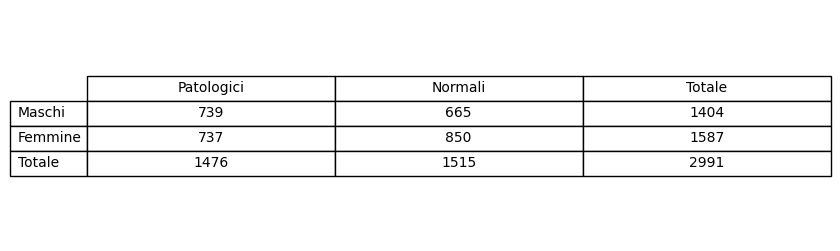

In [7]:
def create_simple_table_plot(data, row_labels, col_labels, title="Mia Tabella"):

    if len(data) != 2 or len(data[0]) != 2:
        raise ValueError("I dati originali devono essere una lista di liste 2x2.")
    if len(row_labels) != 2 or len(col_labels) != 2:
        raise ValueError("Le etichette di riga e colonna originali devono essere esattamente 2.")
    data_np = np.array(data)
    row_sums = np.sum(data_np, axis=1) 
    col_sums = np.sum(data_np, axis=0) 
    grand_total = np.sum(data_np)
    extended_data = []
    for i in range(len(data_np)):
        extended_data.append(data_np[i].tolist() + [row_sums[i]])
    extended_data.append(col_sums.tolist() + [grand_total])
    extended_row_labels = row_labels + ['Totale']
    extended_col_labels = col_labels + ['Totale']
    fig, ax = plt.subplots(figsize=(8, 3)) 
    ax.axis('off') 
    ax.set_title(title)
    table = ax.table(cellText=extended_data,
                     rowLabels=extended_row_labels,
                     colLabels=extended_col_labels,
                     loc='center',
                     cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5) 
    plt.show()
ab_m = np.sum(count_pat_m)
n_m = np.sum(count_n_m)
ab_f = np.sum(count_pat_f)
n_f = np.sum(count_n_f)
data = [[ab_m,n_m],
        [ab_f,n_f]]
row_lab = ['Maschi','Femmine']
col_lab = ['Patologici','Normali']
create_simple_table_plot(data, row_lab, col_lab, '')

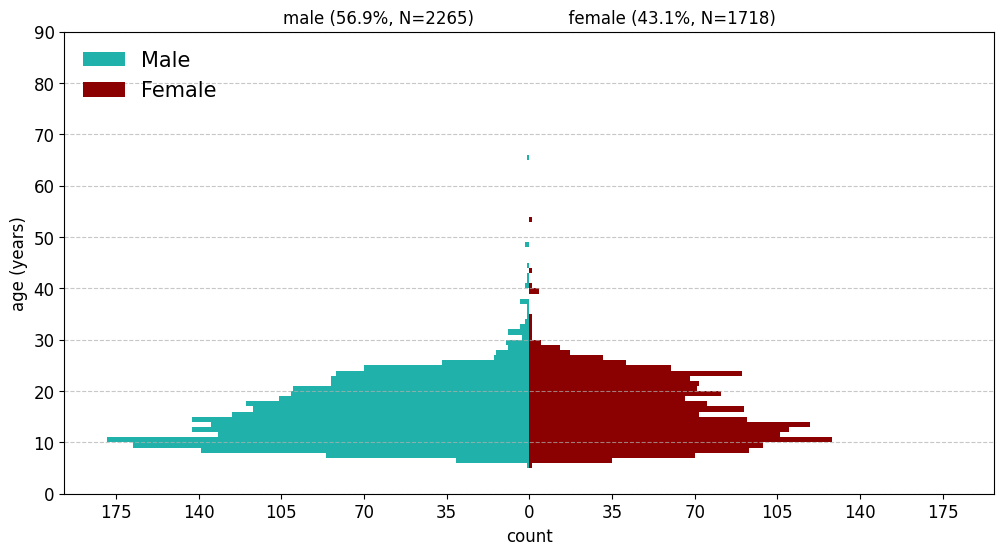

In [5]:
def create_age_pyramid_from_sex_age(ax, ages_male, ages_female, bins, title_suffix=""):
    hist_male, _ = np.histogram(ages_male, bins=bins)
    hist_female, _ = np.histogram(ages_female, bins=bins)
    total_males = len(ages_male)
    total_females = len(ages_female)
    total_overall = total_males + total_females
    male_overall_pct = (total_males / total_overall * 100) if total_overall > 0 else 0
    female_overall_pct = (total_females / total_overall * 100) if total_overall > 0 else 0
    ax.set_title(f"male ({male_overall_pct:.1f}%, N={total_males}) "
                 f"                 female ({female_overall_pct:.1f}%, N={total_females})")
    bin_centers = bins[:-1] + np.diff(bins)/2
    ax.barh(bin_centers, -hist_male, height=1, color='lightseagreen', label='Male', alpha=1) 
    ax.barh(bin_centers, hist_female, height=1, color='darkred', label='Female', alpha=1) 
    max_count = max(hist_male.max(), hist_female.max())
    ax.set_xlim(-max_count * 1.1, max_count * 1.1)
    ticks = np.arange(0, max_count + 1, max_count // 5 if max_count > 5 else 1)
    ax.set_xticks([-t for t in ticks if t > 0] + list(ticks))
    ax.set_xticklabels([str(abs(int(t))) for t in ax.get_xticks()])
    ax.set_xlabel('count', fontsize=12)
    ax.set_ylabel('age (years)', fontsize=12)
    ax.set_ylim(0, 90) 
    ax.set_yticks(np.arange(0, 91, 10))
    ax.legend(loc='upper left', frameon=False, fontsize=15)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
df_eta = pd.read_csv("D:/nchsdb/datasets/nchsdb-dataset-0.3.0.csv")
date_nati = list(df_eta['birth_date'].iloc())
sesso = list(df_eta['pcori_gender_cd'].iloc())
oggi = [date.today() for i in range(len(date_nati))]
eta = [k.year-int(i[6:]) for k,i in zip(oggi, date_nati)]
fig, axes = plt.subplots(1, 1, figsize=(12, 6), sharey=True)
sesso = np.array(sesso)
eta = np.array(eta)
bins = np.arange(0, 101, 1)
males_idx = (sesso=='M')
female_idx = (sesso=='F')
eta_m = eta[males_idx]
eta_f = eta[female_idx]
create_age_pyramid_from_sex_age(axes, eta_m, eta_f, bins)

In [5]:
raw = mne.io.read_raw_edf("D:/nchsdb/sleep_data/10_22339.edf")

Extracting EDF parameters from D:\nchsdb\sleep_data\10_22339.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [27]:
eta_m_c = Counter(eta_m)
eta_f_c = Counter(eta_f)
eta_m_ordinato = dict(sorted(eta_m_c.items()))
eta_f_ordinato = dict(sorted(eta_f_c.items()))
tot_eta = eta_m_c + eta_f_c
sum(tot_eta.values())

3983

In [6]:
print(raw.ch_names)

['Patient Event', 'EOG LOC-M2', 'EOG ROC-M1', 'EMG Chin1-Chin2', 'EEG F3-M2', 'EEG F4-M1', 'EEG C3-M2', 'EEG C4-M1', 'EEG O1-M2', 'EEG O2-M1', 'EEG CZ-O1', 'EMG LLeg-RLeg', 'ECG EKG2-EKG', 'Snore', 'Resp PTAF', 'Resp Airflow', 'Resp Thoracic', 'Resp Abdominal', 'SpO2', 'Rate', 'EtCO2', 'Capno', 'Resp Rate', 'C-flow', 'Tidal Vol', 'Pressure']


In [2]:
import numpy as np

In [6]:
arr = np.random.rand(2, 2, 2)
arr1 = np.random.rand(2, 2, 2)

In [8]:
for o,c in zip(arr,arr1):
    print(o.shape, c.shape)
    for c,v in zip(o,c):
        print(c.shape, v.shape)

(2, 2) (2, 2)
(2,) (2,)
(2,) (2,)
(2, 2) (2, 2)
(2,) (2,)
(2,) (2,)


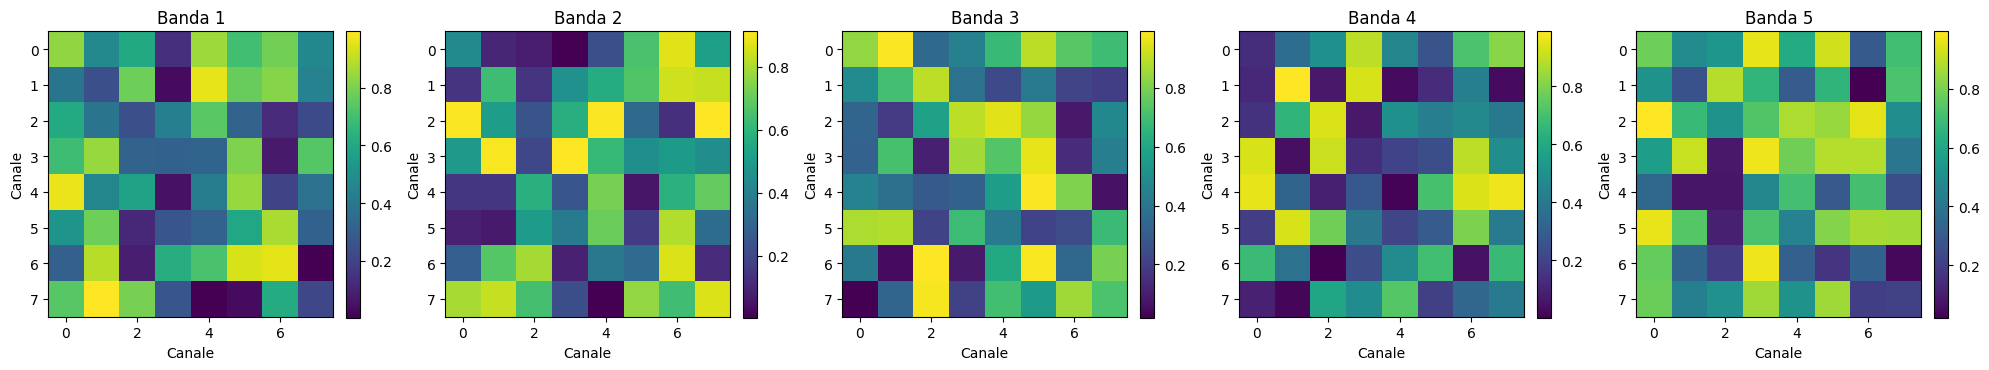

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo che questi siano i tuoi dati e il numero di bande
n_bands = 5
data = np.random.rand(n_bands, 19, 19) # Esempio di dati di correlazione
channels = ['FP1', 'FP2', 'FZ', 'F3', 'F4', 'F7', 'F8', 'CZ', 'C3', 'C4', 'PZ', 'P3', 'P4', 'T3', 'T4', 'T5', 'T6', 'O1', 'O2']

fig, axes = plt.subplots(1, n_bands, figsize=(4*n_bands, 4))
if n_bands == 1: # Fix per il caso di una sola banda
    axes = [axes]

for i in range(n_bands):
    ax = axes[i]
    im = ax.imshow(data[i], cmap='redblue', origin='upper')
    ax.set_title(f'Banda {i+1}')
    ax.set_xlabel('Canale')
    ax.set_ylabel('Canale')

    # Imposta i tick e le etichette per l'asse X
    ax.set_xticks(np.arange(len(channels)))
    ax.set_xticklabels(channels, rotation=90)

    # Imposta i tick e le etichette per l'asse Y
    ax.set_yticks(np.arange(len(channels)))
    ax.set_yticklabels(channels)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()
